In [1]:
#Phase 2 (State/UT wise analysis)
#Note :
#You need to be careful as this phase is whole state/ut wise analysis (not district-wise).
#It is up to you which columns you want to keep or delete to make proper analysis"

#2.1	Analysis of Literacy Rate vs Total Crimes.

#2.2	 Analysis of the type of crime vs each state vs Literacy rate.

#2.3	Analysis of year-on-year total crime rate.

#2.4	 Analysis of area vs overall crime

#2.5	 Analysis of Population vs overall Crime

#2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel(r"C:\Users\asus 1\Desktop\Fliprobo\Crimes in India\Phase 2.2.xlsx")
data.head()
# the data is combined from the data using wikipedia and Crime rate statistics for year 2011 from the website (https://web.archive.org/web/20140104213453/http://www.shareacafe.com/crime-rates-in-indian-state-wise/)

,States,Murder,Attempt To Commit Murder,C.H. Not Amounting to Murder,Rape,Kidnapping & Abduction,Dacoity,Preparation And Assembly ForDacoity,Population,Area(Km2),Literacy
0,ANDHRA PRADESH,2808.0,2229,171,1442.0,2154.0,126,7,84580777,275045,67.02
1,ARUNACHAL PRADESH,65.0,29,2,42.0,93.0,13,0,1383727,83743,65.38
2,ASSAM,1303.0,504,48,NaN,3764.0,305,4,31205576,78438,72.19
3,BIHAR,3198.0,3327,348,934.0,4268.0,556,105,104099452,94163,61.80
4,CHHATTISGARH,1110.0,747,28,1053.0,472.0,68,7,25545198,135192,70.28


In [4]:
data.shape

(35, 11)

In [5]:
data.isnull().sum()

States                                 0
Murder                                 0
Attempt To Commit Murder               0
C.H. Not Amounting to Murder           0
Rape                                   2
Kidnapping & Abduction                 0
Dacoity                                0
Preparation And Assembly ForDacoity    0
Population                             0
Area(Km2)                              0
Literacy                               0
dtype: int64

In [6]:
data.fillna("0.0", inplace = True)

In [7]:
data.isnull().sum()

States                                 0
Murder                                 0
Attempt To Commit Murder               0
C.H. Not Amounting to Murder           0
Rape                                   0
Kidnapping & Abduction                 0
Dacoity                                0
Preparation And Assembly ForDacoity    0
Population                             0
Area(Km2)                              0
Literacy                               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               35 non-null     object 
 1   Murder                               35 non-null     float64
 2   Attempt To Commit Murder             35 non-null     int64  
 3   C.H. Not Amounting to Murder         35 non-null     int64  
 4   Rape                                 35 non-null     object 
 5   Kidnapping & Abduction               35 non-null     float64
 6   Dacoity                              35 non-null     int64  
 7   Preparation And Assembly ForDacoity  35 non-null     int64  
 8   Population                           35 non-null     int64  
 9   Area(Km2)                            35 non-null     int64  
 10  Literacy                             35 non-null     float64
dtypes: float64(3), int64(6), object(2)

In [9]:
data['Rape']=data['Rape'].astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               35 non-null     object 
 1   Murder                               35 non-null     float64
 2   Attempt To Commit Murder             35 non-null     int64  
 3   C.H. Not Amounting to Murder         35 non-null     int64  
 4   Rape                                 35 non-null     float64
 5   Kidnapping & Abduction               35 non-null     float64
 6   Dacoity                              35 non-null     int64  
 7   Preparation And Assembly ForDacoity  35 non-null     int64  
 8   Population                           35 non-null     int64  
 9   Area(Km2)                            35 non-null     int64  
 10  Literacy                             35 non-null     float64
dtypes: float64(4), int64(6), object(1)

In [11]:
data.describe()

,Murder,Attempt To Commit Murder,C.H. Not Amounting to Murder,Rape,Kidnapping & Abduction,Dacoity,Preparation And Assembly ForDacoity,Population,Area(Km2),Literacy
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000
mean,970.520000,896.714286,105.914286,594.428571,1224.091429,122.428571,82.714286,3.459586e+07,93927.685714,77.852286
std,1201.846826,1160.080032,255.355965,800.064456,1839.282025,181.649191,176.812225,4.445234e+07,103761.173574,8.593767
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.447300e+04,30.000000,61.800000
25%,29.000000,34.500000,6.000000,25.000000,22.050000,5.500000,0.000000,1.421136e+06,9367.500000,71.235000
50%,365.000000,478.000000,29.000000,205.000000,314.000000,28.000000,7.000000,1.678794e+07,53483.000000,76.940000
75%,1612.000000,1593.500000,92.500000,859.000000,1504.500000,190.500000,94.500000,6.076749e+07,145449.500000,85.950000
max,4951.000000,4653.000000,1454.000000,3406.000000,8500.000000,773.000000,939.000000,1.998123e+08,342239.000000,94.000000


In [12]:
data.drop(['Population', 'Area(Km2)'], axis=1)

,States,Murder,Attempt To Commit Murder,C.H. Not Amounting to Murder,Rape,Kidnapping & Abduction,Dacoity,Preparation And Assembly ForDacoity,Literacy
0,ANDHRA PRADESH,2808.0,2229,171,1442.0,2154.0,126,7,67.02
1,ARUNACHAL PRADESH,65.0,29,2,42.0,93.0,13,0,65.38
2,ASSAM,1303.0,504,48,0.0,3764.0,305,4,72.19
3,BIHAR,3198.0,3327,348,934.0,4268.0,556,105,61.80
4,CHHATTISGARH,1110.0,747,28,1053.0,472.0,68,7,70.28
5,GOA,48.0,22,6,29.0,28.0,2,0,88.70
6,GUJARAT,1126.0,478,43,439.0,1614.0,221,24,78.03
7,HARYANA,1062.0,851,60,733.0,959.0,167,176,75.55
8,HIMACHAL PRADESH,130.0,50,6,168.0,212.0,1,0,82.80
9,JAMMU & KASHMIR,1.1,494,29,277.0,1077.0,14,0,67.16


In [13]:
column=data.columns[1:]
column

Index(['Murder', 'Attempt To Commit Murder', 'C.H. Not Amounting to Murder',
       'Rape', 'Kidnapping & Abduction', 'Dacoity',
       'Preparation And Assembly ForDacoity', 'Population', 'Area(Km2)',
       'Literacy'],
      dtype='object')

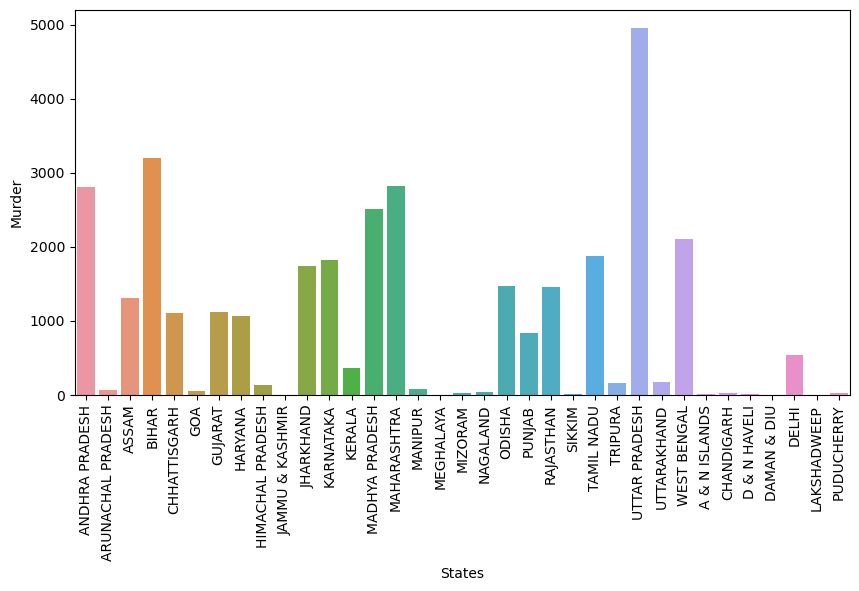

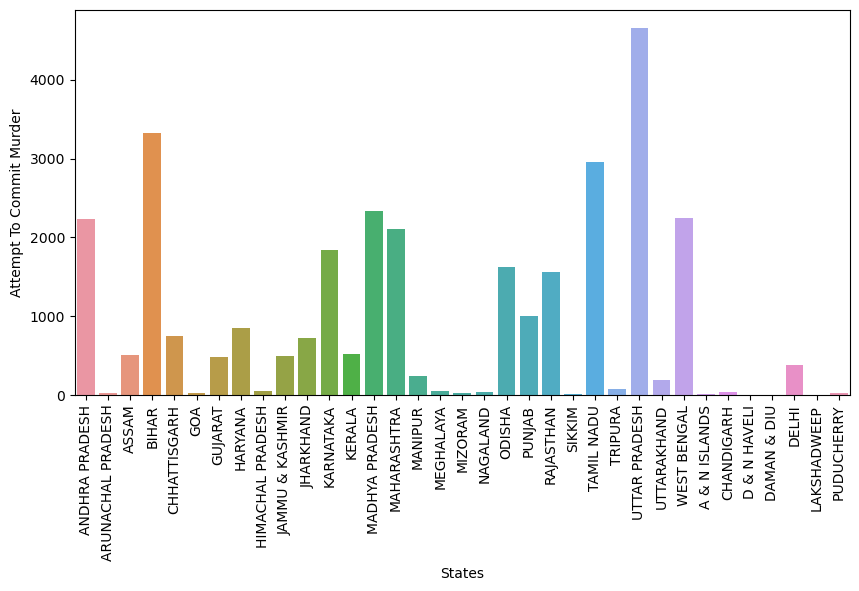

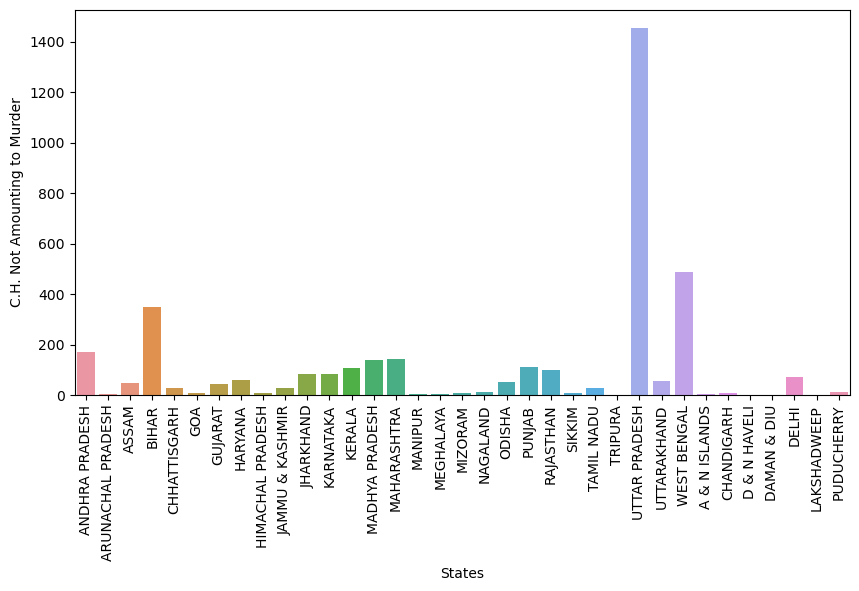

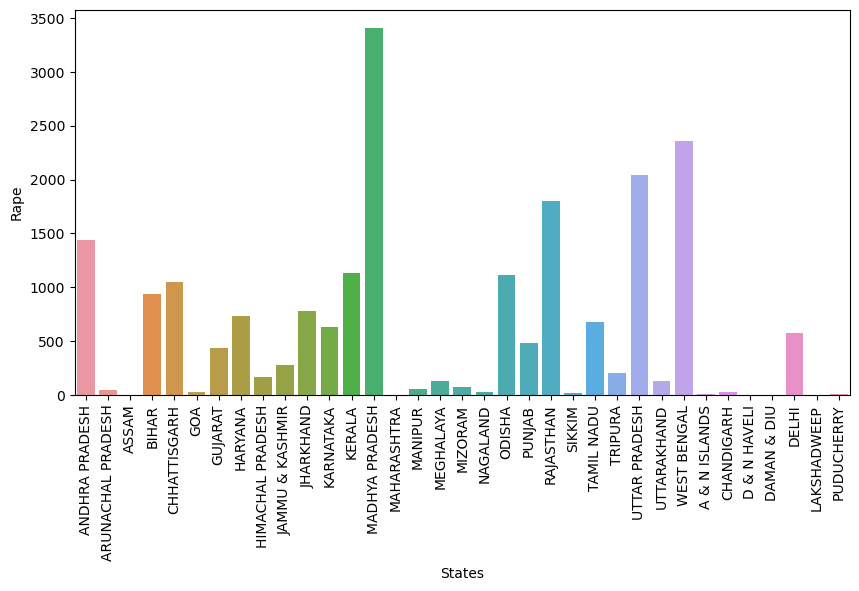

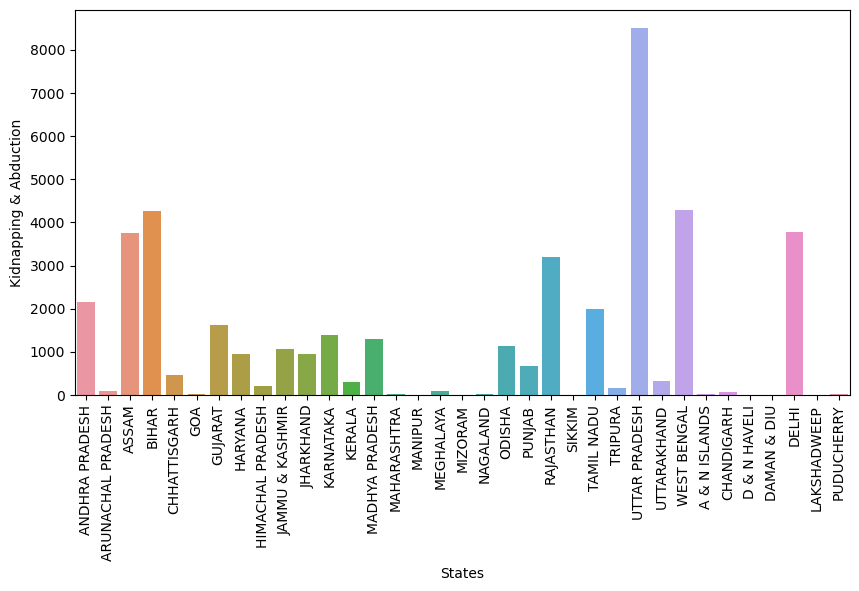

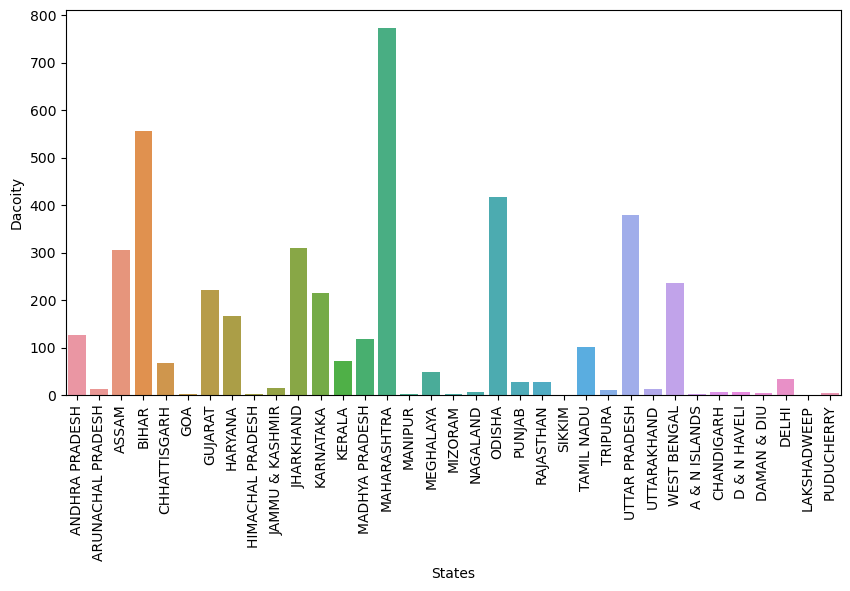

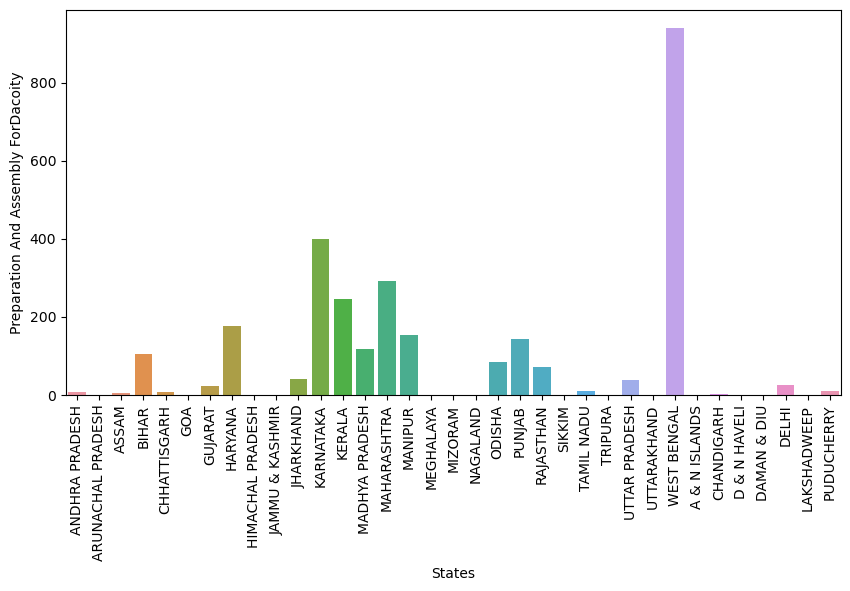

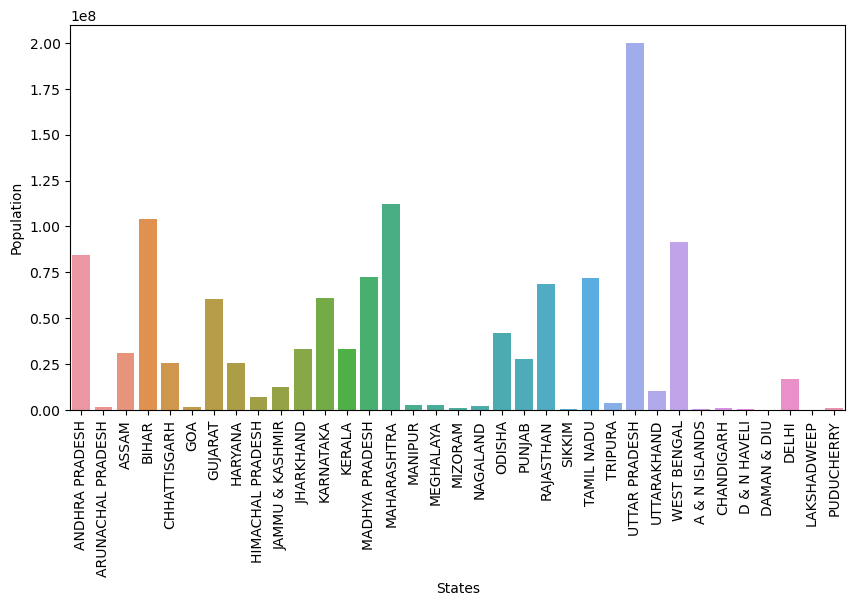

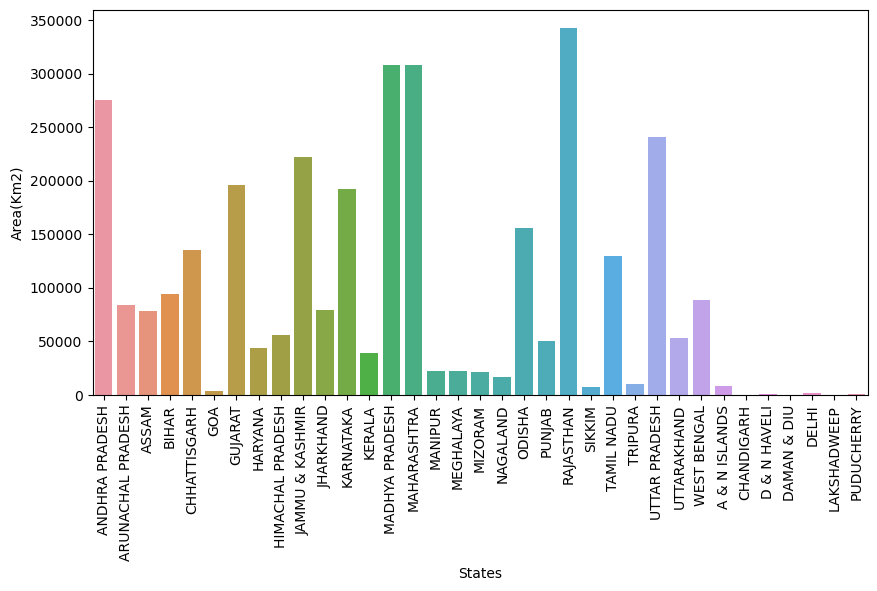

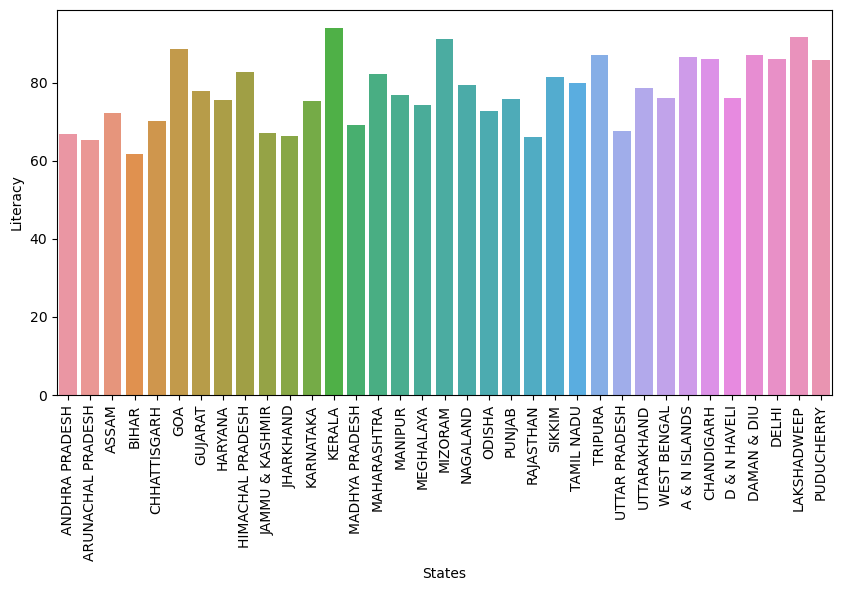

In [14]:
for i in column:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='States',y=i, data=data)
    plt.xticks(rotation=90)
    plt.show()

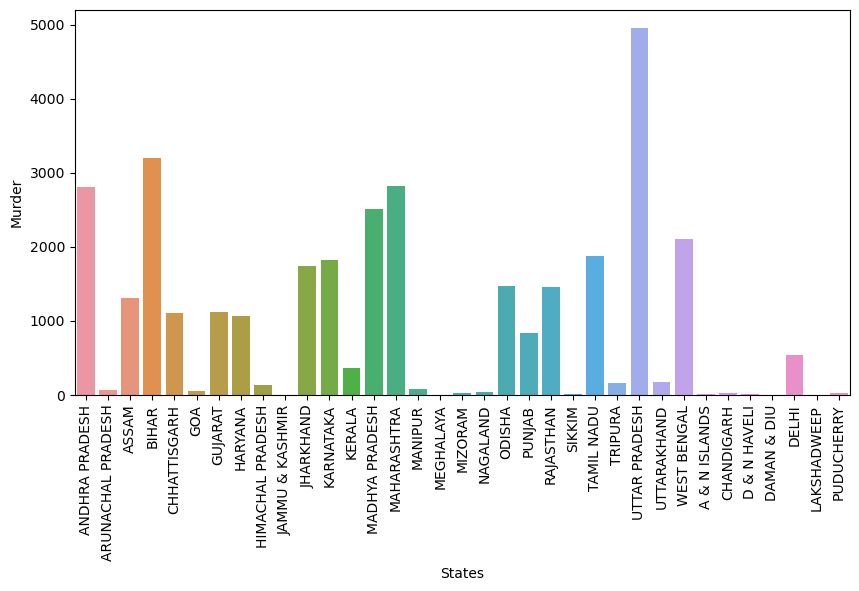

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States',y='Murder', data=data)
plt.xticks(rotation=90)
plt.show()

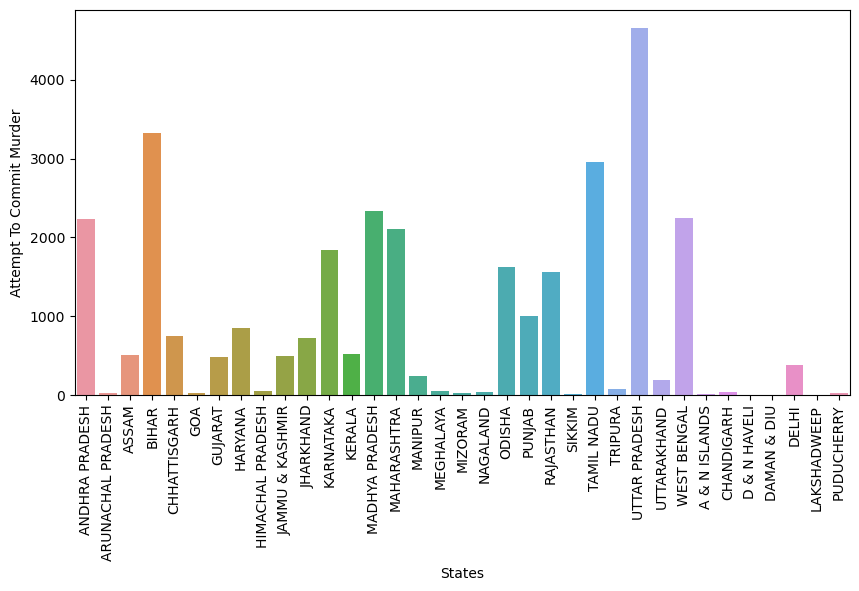

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States',y='Attempt To Commit Murder', data=data)
plt.xticks(rotation=90)
plt.show()

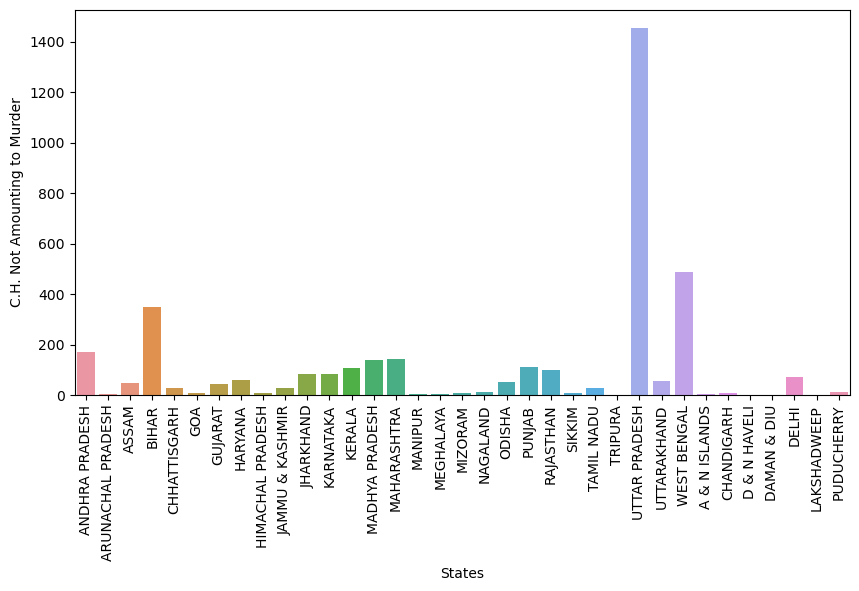

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States',y='C.H. Not Amounting to Murder', data=data)
plt.xticks(rotation=90)
plt.show()

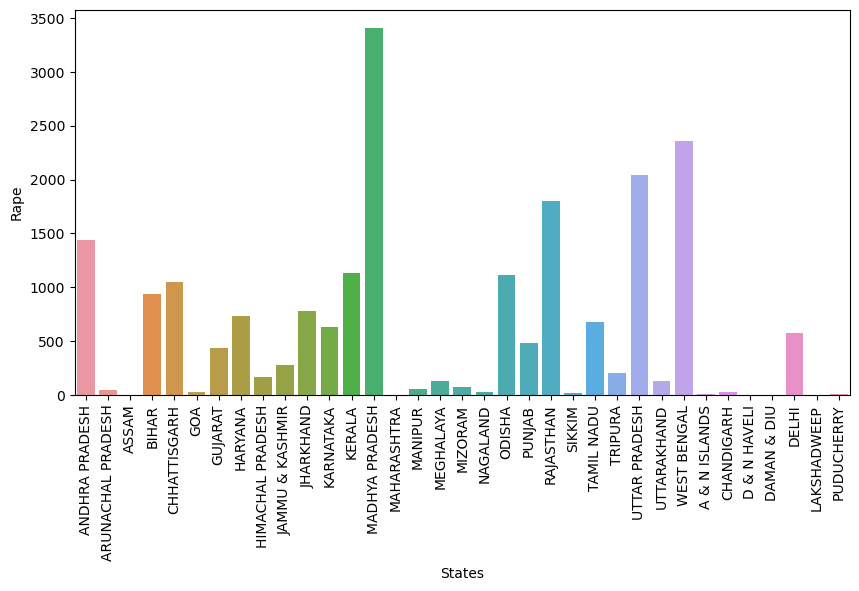

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States',y='Rape', data=data)
plt.xticks(rotation=90)
plt.show()

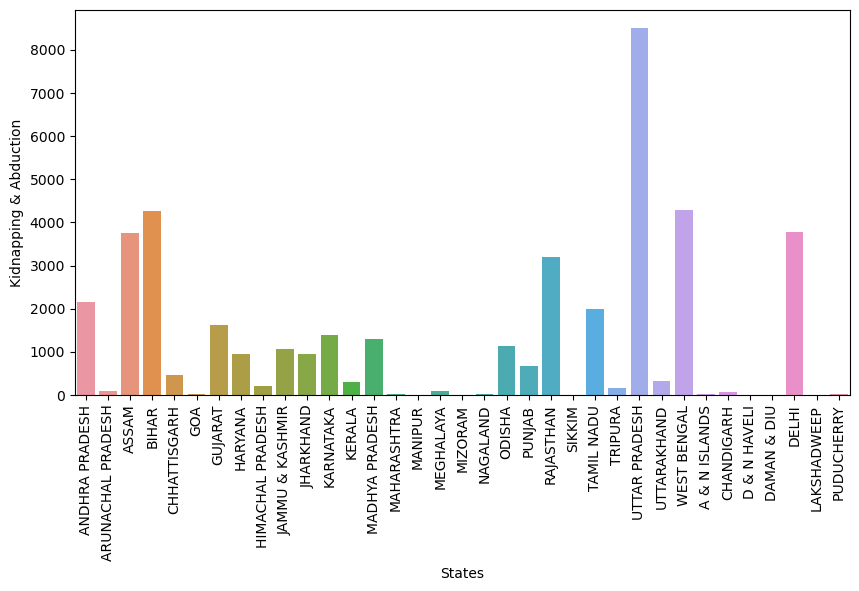

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States',y='Kidnapping & Abduction', data=data)
plt.xticks(rotation=90)
plt.show()

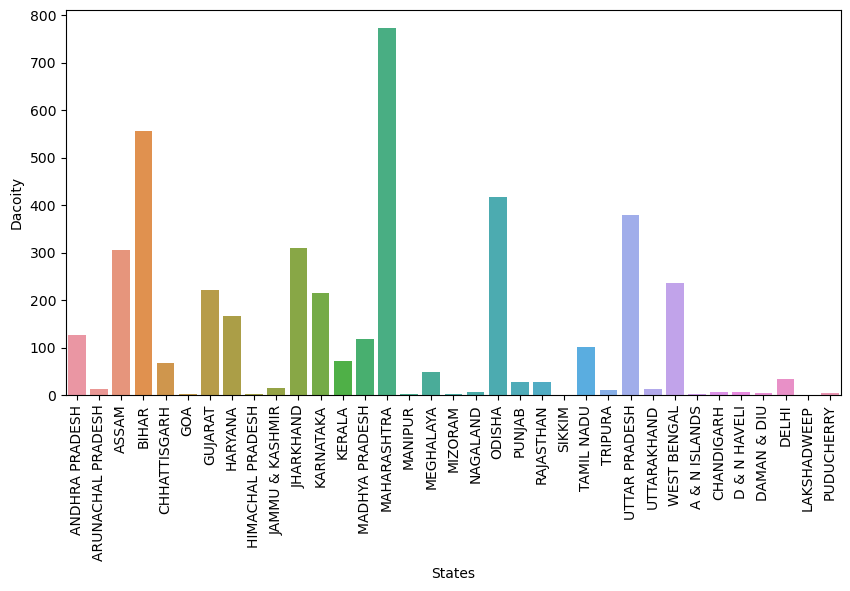

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States',y='Dacoity', data=data)
plt.xticks(rotation=90)
plt.show()

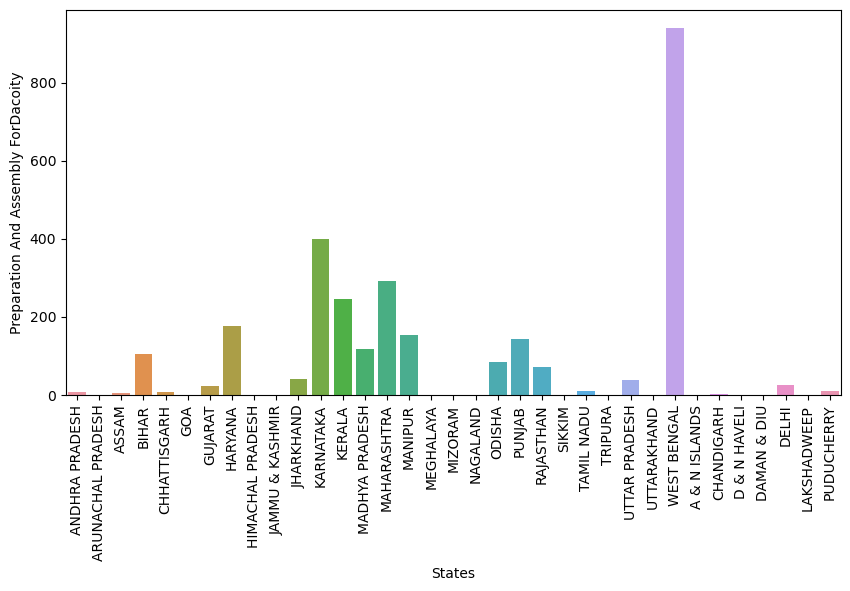

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States',y='Preparation And Assembly ForDacoity', data=data)
plt.xticks(rotation=90)
plt.show()

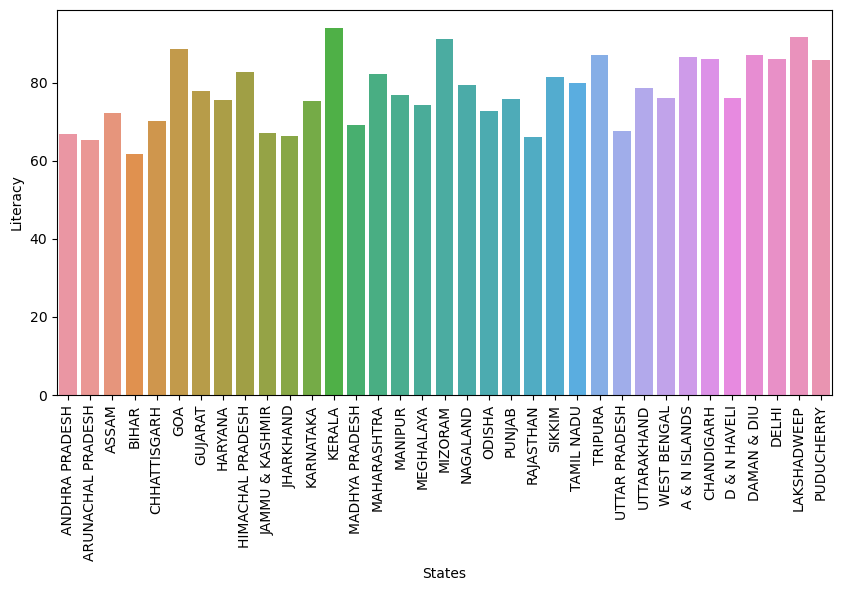

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x='States',y='Literacy', data=data)
plt.xticks(rotation=90)
plt.show()

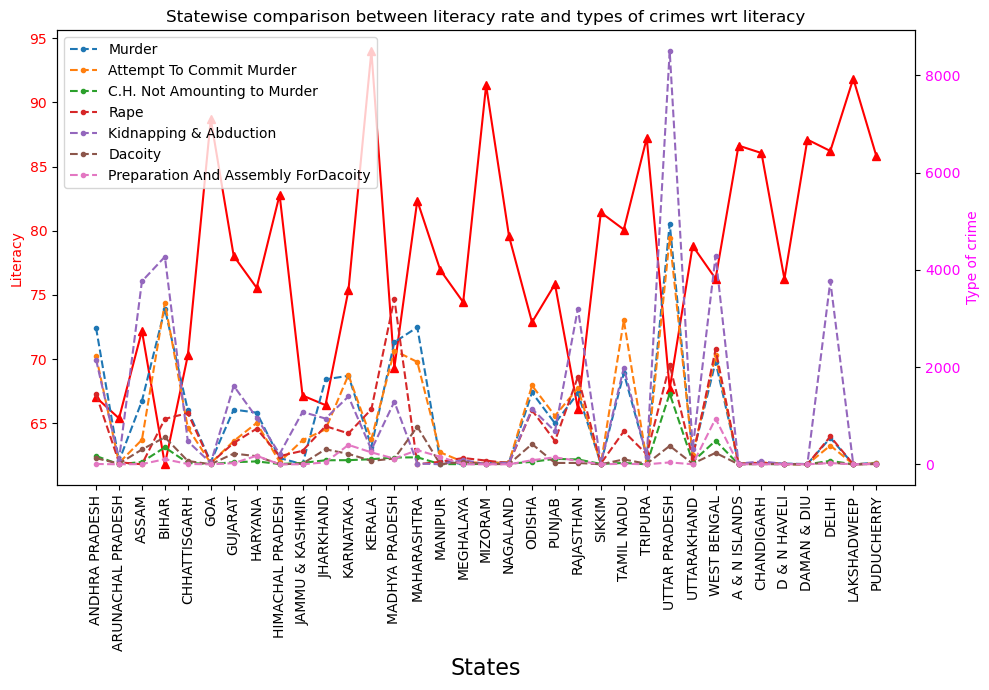

In [23]:
fig=plt.figure(figsize=(10,7))
plt.plot(data['States'],data['Literacy'],color='red',marker='^', label='Literacy')
plt.tick_params(axis='y', labelcolor='red')
plt.ylabel('Literacy',color='red')
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
ax2 = plt.twinx()
plt.plot(data['States'],data['Murder'], marker='.',ls='--', label='Murder')
plt.plot(data['States'],data['Attempt To Commit Murder'], marker='.',ls='--', label='Attempt To Commit Murder')
plt.plot(data['States'],data['C.H. Not Amounting to Murder'], marker='.',ls='--', label='C.H. Not Amounting to Murder')
plt.plot(data['States'],data['Rape'], marker='.',ls='--', label='Rape')
plt.plot(data['States'],data['Kidnapping & Abduction'], marker='.',ls='--', label='Kidnapping & Abduction')
plt.plot(data['States'],data['Dacoity'], marker='.',ls='--', label='Dacoity')
plt.plot(data['States'],data['Preparation And Assembly ForDacoity'], marker='.',ls='--', label='Preparation And Assembly ForDacoity')
plt.ylabel('Type of crime',color='magenta')
plt.tick_params(axis='y', labelcolor='magenta')
plt.title('Statewise comparison between literacy rate and types of crimes wrt literacy')
plt.tight_layout()
plt.legend()
plt.show()

# Analysis

In [24]:
# As per the analysis 

#Bihar is having the lowest literacy rate and the max number of crime in the state among all the crimes is Kidnapping and abduction followed by Attempt to comit murder.
#UP is having the low literacy rate and rate of commitment of crimes is high like murder, attempt to murder, Kidnapping.
#Maximum rape cases are reported in Madhya Pradesh and the literacy rate is average.
#The crime thet is commited most in Delhi is Kidnapping and abduction.
#In many states the most commited crime is Kidnapping and abduction. 
#In Bihar, Up, TN, MP rate of attempt to murder is also high as compared to other states. 
#As per the data Maximum number of murders were commited in the state of UP.
#Kerala reported the highest literacy rate and very less commitment of crimes.
#There are many states with very less crime like Meghalaya, Mizoram, Chandigarh, D&N Haveli, Lakshadweep, Puducherry, Goa and the Literacy rate in Goa, Lakshadweep and Mozoram is among the highest of all states.